# Bidimensional Fourier Transform
The BidimensionalFourierTransform computes FFT of functions defined on bidimensional domain and return a ScalarBidimensionalFunction representing the spectrum and the frequency domain.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from arte.utils.discrete_fourier_transform import \
    BidimensionalFourierTransform as bfft
from arte.types.domainxy import DomainXY
from arte.types.scalar_bidimensional_function import ScalarBidimensionalFunction

### Direct transform of 2D functions
In the simplest example we transform a constant function of amplitude=1 defined in the domain [-2,2), sampled on 4x4 grid. As the normalization perserve the total power we expect a spectrum centered in (0,0) with amplitude sqrt(16)

Values:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 0.]]
Freq X:
[[-0.5  -0.25  0.    0.25]
 [-0.5  -0.25  0.    0.25]
 [-0.5  -0.25  0.    0.25]
 [-0.5  -0.25  0.    0.25]]
Freq Y:
[[-0.5  -0.5  -0.5  -0.5 ]
 [-0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25]]


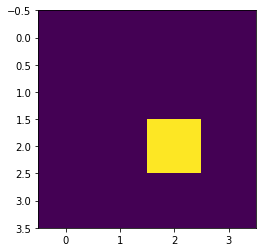

In [2]:
sz = 4
spatial_step= 1.0
ampl = 1.0
xy = DomainXY.from_shape((sz, sz), spatial_step)
constant_map= ampl*np.ones(xy.shape) 
spatial_funct = ScalarBidimensionalFunction(constant_map, domain=xy)
spectr = bfft.direct(spatial_funct)
plt.imshow(abs(spectr.values))
print("Values:\n%s" % abs(spectr.values))
print("Freq X:\n%s" % spectr.xmap)
print("Freq Y:\n%s" % spectr.ymap)

### Inverse Transform
The inverse transform return the original spatial function, as expected.

In [3]:
inverse_spectr = bfft.inverse(spectr)
print("Values:\n%s" % inverse_spectr.values)
print("Freq X:\n%s" % inverse_spectr.xmap)
print("Freq Y:\n%s" % inverse_spectr.ymap)

Values:
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
Freq X:
[[-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]]
Freq Y:
[[-2. -2. -2. -2.]
 [-1. -1. -1. -1.]
 [ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]]


### Normalization
Spectra are normalized to preserve total energy    

In [21]:
xy = DomainXY.from_xy_vectors(np.linspace(-2,2,4), np.linspace(-4,0,5))
spatial_map = np.random.random(xy.xmap.shape)
spatial_funct = ScalarBidimensionalFunction(spatial_map, domain=xy)
spectral_funct = bfft.direct(spatial_funct)
print("Power of spatial funct %g" % np.linalg.norm(spatial_funct.values))
print("Power of spectral funct %g" % np.linalg.norm(spectral_funct.values))

Power of spatial funct 2.59543
Power of spectral funct 2.59543


### Non centered domain
The same example as before, on a spatial domain centered in (3,2) instead of the origin

Spatial Domain X: [1.5 2.5 3.5 4.5]
Spatial Domain Y: [0.5 1.5 2.5 3.5]
Spectrum Map:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 0.]]
Freq X: [-0.5  -0.25  0.    0.25]
Freq Y: [-0.5  -0.25  0.    0.25]


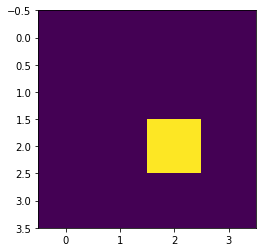

In [4]:
sz = 4
spatial_step= 1.0
ampl = 1.0
xy = DomainXY.from_shape((sz, sz), spatial_step)
xy.shift(3, 2)
constant_map= ampl*np.ones(xy.shape) 
spatial_funct = ScalarBidimensionalFunction(constant_map, domain=xy)
spectr = bfft.direct(spatial_funct)
plt.imshow(abs(spectr.values))
print("Spatial Domain X: %s" % xy.xcoord)
print("Spatial Domain Y: %s" % xy.ycoord)
print("Spectrum Map:\n%s" % abs(spectr.values))
print("Freq X: %s" % spectr.xcoord)
print("Freq Y: %s" % spectr.ycoord)

### Direct transform on rectangular, unevenly spaced domain
In the example below the spectrum of a constant function defined on a rectangular domain with regular sampling is computed. With a spatial domain of (x,y)=(20,10) points sampled at dx=0.1 and dy=0.4, we expect the spectral range to have minimum frequencies $(f^{min}_x, f^{min}_y) = (5, 1.25)$ and spectral resolution $(df_x, df_y) = (0.5, 0.25)$

spatial domain X: [-0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15
  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]
spatial domain Y: [-1.8 -1.4 -1.  -0.6 -0.2  0.2  0.6  1.   1.4  1.8]
spectral value in (0,0) should be 14.1421
Check: v(0,0) = 14.1421
Min/Max freq x should be 5. delta_freq_x should be 0.5
Check: freq x min/max/delta -5/4.5/0.5
Min/Max freq y should be 1.25. delta_freq_x should be 0.25
Check: freq y min/max/delta -1.25/1/0.25


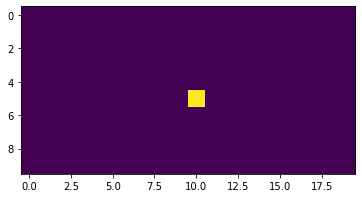

In [5]:
szx, szy = (20,10)
stepx, stepy= (0.1, 0.4)
ampl = 1.0
xy = DomainXY.from_shape((szy, szx), (stepy, stepx))
constant_map= ampl*np.ones(xy.shape) 
spatial_funct = ScalarBidimensionalFunction(constant_map, domain=xy)
spectr = bfft.direct(spatial_funct)
plt.imshow(abs(spectr.values))

print("spatial domain X: %s" % xy.xcoord)
print("spatial domain Y: %s" % xy.ycoord)

print("spectral value in (0,0) should be %g" % (np.sqrt(ampl*szx*szy)))
print("Check: v(%g,%g) = %g" % (
    spectr.xmap[szy//2, szx//2],spectr.ymap[szy//2,szx//2],spectr.values[szy//2,szx//2].real))
freq_step_x, freq_step_y = spectr.domain.step
print("Min/Max freq x should be %g. delta_freq_x should be %g" % (
    0.5/stepx, 1/(szx*stepx)))
print("Check: freq x min/max/delta %g/%g/%g" % (spectr.xcoord[0], spectr.xcoord[-1], freq_step_x))
print("Min/Max freq y should be %g. delta_freq_x should be %g" % (
    0.5/stepy, 1/(szy*stepy)))
print("Check: freq y min/max/delta %g/%g/%g" % (spectr.ycoord[0], spectr.ycoord[-1], freq_step_y))


### Units
The discrete_fourier_transform module preserve units

In [6]:
from astropy import units as u
szx, szy = (20,10)
stepx, stepy= (0.1 * u.m, 0.4*u.kg)
ampl = 1.0 * u.V
xy = DomainXY.from_shape((szy, szx), (stepy, stepx))
map_in_V= ampl*np.ones(xy.shape) 
spatial_funct = ScalarBidimensionalFunction(map_in_V, domain=xy)
spectr = bfft.direct(spatial_funct)
print("Spectrum xmap unit: %s" % spectr.xmap.unit)
print("Spectrum ymap unit: %s" % spectr.ymap.unit)
print("Spectrum xcoord unit: %s" % spectr.xcoord.unit)
print("Spectrum ycoord unit: %s" % spectr.ycoord.unit)
print("Spectrum value unit: %s" % spectr.values.unit)

Spectrum xmap unit: 1 / m
Spectrum ymap unit: 1 / kg
Spectrum xcoord unit: 1 / m
Spectrum ycoord unit: 1 / kg
Spectrum value unit: V


### Transform of numpy array
The class BidimensionalFourierTransform is meant to be used with ScalarBidimensionalFunction, but it provides also the two methods direct_transform and inverse_transform that can be used with numpy arrays representing the function values. The return value is a complex array, the computation of the frequency domain is demanded to the user.

In [7]:
sz = 10
constant_map = np.ones((sz, sz)) * 3.3
res = bfft.direct_transform(constant_map)
res[4:7,4:7]

array([[ 0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, 33.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j]])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.38854184e-18 5.87009310e-16 2.63739711e-16 3.50612825e-16
  2.80900961e-16 5.51212035e-16 5.82806108e-16 1.03947191e-15
  3.16227766e+00 8.63625182e-16 3.15975012e-16 8.63625182e-16
  3.16227766e+00 1.03947191e-15 5.82806108e-16 5.51212035e-16
  7.02166694e-17 3.50612825e-16 2.63739711e-16 5.87009310e-16]] V
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5] 1 / s
[-0.5  0. ] 1 / kg


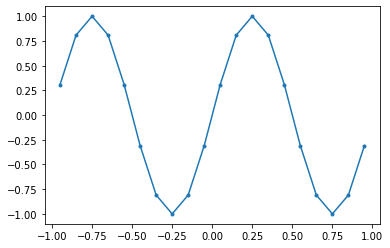

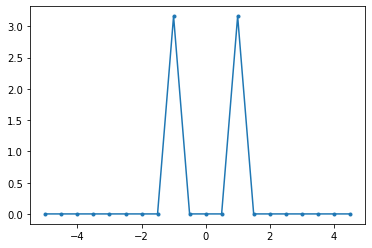

In [40]:
from astropy import units as u
szx, szy = (20,2)
stepx, stepy= (0.1 * u.s, 1*u.kg)
ampl = 1.0 * u.V
period = 1 * u.s
xy = DomainXY.from_shape((szy, szx), (stepy, stepx))
map_in_V= ampl*np.sin( (2*np.pi*xy.xmap/period).to(u.rad, equivalencies=u.dimensionless_angles())) 
spatial_f = ScalarBidimensionalFunction(map_in_V, domain=xy)
spectral_f = bfft.direct(spatial_f)
print(np.abs(spectral_f.values))
print(spectral_f.xcoord)
print(spectral_f.ycoord)
plt.figure()
plt.plot(spatial_f.xmap[0,:], spatial_f.values[0,:], '.-')
plt.figure()
plt.plot(spectral_f.xmap[1,:], np.abs(spectral_f.values)[1,:], '.-')